# Loading the Libraries

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Load the Dataset in a DataFrame


In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Exploratory Data Analysis (EDA)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## How many people survived and how many people did not survise from our dataset?

In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


## What is the percentage breakdown of the survival data?

In [ ]:
titanic_data['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


## Number of unique values  in the Cabin and Embarked columns?

In [ ]:
titanic_data['Cabin'].nunique()

147

In [ ]:
titanic_data['Embarked'].nunique()

3

In [ ]:
titanic_data[['Cabin', 'Embarked']].nunique()

,0
Cabin,147
Embarked,3


## Additional Exploration

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### The number of nulls in Cabin

In [ ]:
titanic_data['Cabin'].isnull().sum()

687

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## What are the unique values of Embarked?

In [ ]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Extract X and y from the DataFrame

*   Place these four columns in a variable X - **'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'**
*   Place this column in a variable y - **'Survived'**

In [ ]:
# Select the features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'
X = titanic_data[features]
y = titanic_data[target]

In [ ]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# type (y)

In [ ]:
# type(X)

In [ ]:
# type(X['Age'])

In [ ]:
# X['Age']

# Preprocess the data

In [ ]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [ ]:
numeric_features

['Age', 'Fare']

In [ ]:
categorical_features

['Pclass', 'Sex', 'Embarked']

In [ ]:
print(titanic_data['Pclass'].unique())
print(titanic_data['Sex'].unique())
print(titanic_data['Embarked'].unique())

[3 1 2]
['male' 'female']
['S' 'C' 'Q' nan]


In [ ]:
titanic_data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
print(sorted(titanic_data['Pclass'].unique()))
print(sorted(titanic_data['Sex'].unique()))

[1, 2, 3]
['female', 'male']


In [ ]:
print(titanic_data['Pclass'].unique())
print(titanic_data['Sex'].unique())
print(titanic_data['Embarked'].unique())

[3 1 2]
['male' 'female']
['S' 'C' 'Q' nan]


In [ ]:
X[categorical_features]

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
886,2,male,S
887,1,female,S
888,3,female,S
889,1,male,C


In [ ]:
X[categorical_features].nunique()

,0
Pclass,3
Sex,2
Embarked,3


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
X = preprocessor.fit_transform(X)
X

array([[22.        ,  7.25      ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [38.        , 71.2833    ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [29.69911765, 23.45      ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [26.        , 30.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [32.        ,  7.75      ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[0]

array([22.  ,  7.25,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  0.  ])

In [ ]:
X[1]

array([38.    , 71.2833,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,
        1.    ,  0.    ,  0.    ,  0.    ])

In [ ]:
X.shape

(891, 11)

In [ ]:
X[0]

array([22.  ,  7.25,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  0.  ])

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier

In [ ]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make predictions on the test set

In [ ]:
y_pred = clf.predict(X_train)

# Evaluate the model on training set


In [ ]:
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9791332263242376


# Make predictions on the test set

In [ ]:
y_pred = clf.predict(X_test)

# Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.753731343283582


# Is this a good model based on the training and test accuracy results?

# Plot the ROC Curve for this model

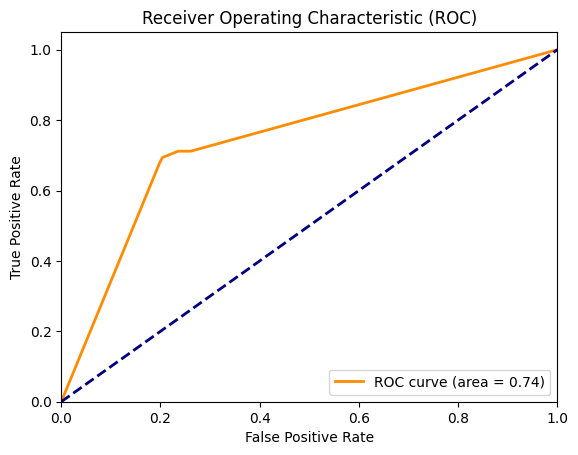

In [ ]:
y_probs = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Try to come up with a better classifier

# RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7686567164179104


# Logistic Regression

In [ ]:
logreg_clf = LogisticRegression(random_state=42, max_iter=1000)

logreg_clf.fit(X_train, y_train)

y_pred_logreg = logreg_clf.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8022388059701493
